# Perceptron

#### Artificial Neuron
- has >= 1 binary inputs and 1 binary output
- Can perform logical computations
- AND, OR, NOT, etc

#### Threshold Logic Unit or Linear Threshold Unit
- Inputs and outputs are numbers instead of binary
- Computes a linear function/weighted sum
- Applies a step function
  - most common is Heaviside step function
  - i.e. h(z) = 0 if z < 0 else 1
- Can perform linear binary clf

#### Perceptron
- Composed of 1 or more TLUs in a single layer
- Every TLU is connected to every input
- Makes a <b>Fully Connected</b> or <b>Dennse</b> Layer
- Can perform multi-label and multi-class clf

#### Training Perceptrons
- Based on <b>Hebb's rule</b> or <b>Hebbian Learning</b>
  - States that if a neuron often triggers another neuron, the connection b/w these 2 grows stronger
- Perceptron learning rule takes error into account
  - Reinforces connections that reduce error
- w<sup>(next step)</sup><sub>i,j</sub> = w<sub>i,j</sub> + eta * (y<sub>j</sub> - yhat<sub>j</sub>) * x<sub>i</sub>

#### Perceptron Convergence Theorem
 - If instances are linearly separable, this algo will converge to a solution

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0)  # Iris Setosa

p_clf = Perceptron(random_state=42)
p_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = p_clf.predict(X_new)
y_pred

array([ True, False])

In [2]:
from sklearn.linear_model import SGDClassifier

# prev perceptron is equivalent to this
sgd_clf = SGDClassifier(loss='perceptron', learning_rate='constant', eta0=1, penalty=None)
sgd_clf.fit(X, y)
sgd_clf.predict(X_new)

array([ True, False])

Perceptrons don't output a class proba unlike Logistic Regression, so LR is preferred for this reason.
<br>Perceptrons also don't use any regularization by default and training stops when there are no errors on training set, so they don't generalize as well as LR or linear SVM clf.
<br>But Perceptrons may train faster

#### Multi-Layer Perceptron
- Stacking multiple perceptrons
- Solves XOR problem and limitations of Perceptron
- Signal flows in 1 direction (inputs to outputs), so this architecture is a <b>Feed-Forward Network</b>
- When ANN has a deep stack of hidden layers, it's a <b>Deep Nerual Network</b>

#### Reverse-Mode Automatic Differentiation
- reverse-mode autodiff
- For training, we can use gradients.
- For finding gradients w.r.t all params efficiently, we have this algo.
- In 2 passes (forward and backward), it can compute gradients of error w.r.t every model parameter
- This algo when used with gradient descent is called <b>backpropagation</b>
- This is done efficiently by storing intermediate results/outputs of each neuron and by using <b>chain rule</b>

There are different autodiff techniques
<br>Reverse-mode autodiff is well-suited when function has many variables and few outputs
 - connection, weights, biases -> many inputs
 - one loss -> few outputs

Backprop can be applied to all kinds of computational graphs, not just NNs.

Important to init all HL's connection weights randomly or <b>training will fail</b>
<br>E.g., if all w and b are init to 0, then all neurons in a layer will be identical and backprop will affect them in the same way which means model acts as if there's only 1 neuron per layer.
<br>Randomly initializing wights is used to <b>break the symmetry</b>

#### Activation Functions
- We replace step function with logistic/sigmoid function as step function only contains flat segments, so there are no gradients to work with.
- Other choices:
  - tanh(z) = 2 * sigmoid(2 * z) - 1
    - like sigmoid but is b/w -1 to +1
    - this range makes each layer's output centered around 0 at beginning, which <b>speeds up convergence</b>
  - ReLU(z) = max(0, z)
    - Works well, fast to compute
    - It's the default choice
    - It doesn't have a maximum output value, which solves some issues in gradient descent

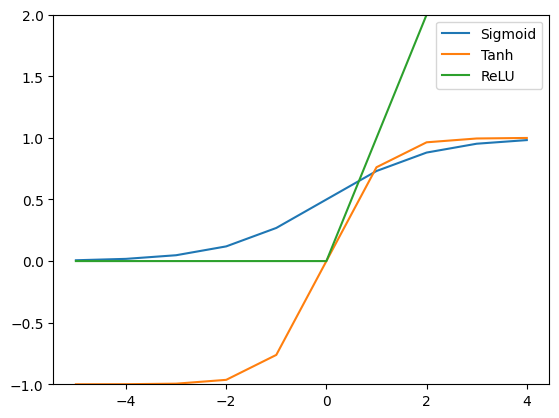

In [3]:
import matplotlib.pyplot as plt

X = np.arange(-5, 5).reshape(-1, 1)
y_sig = 1. / (1. + np.exp(-X))
y_tanh = np.tanh(X)
y_relu = X.copy()
y_relu[X < 0] = 0

plt.plot(X, y_sig, label='Sigmoid')
plt.plot(X, y_tanh, label='Tanh')
plt.plot(X, y_relu, label='ReLU')
plt.legend()
plt.ylim(-1, 2)
plt.show()

# Regression MLPs

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_tr_full, X_ts, y_tr_full, y_ts = train_test_split(housing.data, housing.target, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_full, y_tr_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

# important to standardize the features
# or Gradient Descent won't converge well when features have different scales
pipe = make_pipeline(StandardScaler(), mlp_reg)
pipe.fit(X_tr, y_tr)

y_pred = pipe.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.5053326657968756

In above, MLP doesn't use any activation function for output layer.
<br>To guarantee that the output is +ve, we should use ReLU or <b>softplus</b> activation function
<br>Softplus is a smooth variant of ReLU: log(1 + e<sup>z</sup>)

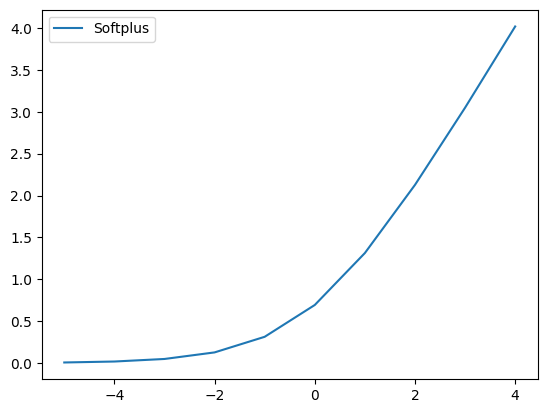

In [5]:
y_softplus = np.log(1. + np.exp(X))

plt.plot(X, y_softplus, label='Softplus')
plt.legend()
plt.show()

To guarantee output is within given range of values, use sigmoid or tanh.

<br>MLPRegressor doesn't support activation functions in output layer
<br>Making MLP using sklearn is convenient, but NN features are limited, so Keras is used.

### Huber Loss
Conbination of MSE and MAE
<br>Use when outliers, cuz MSE is sensitive to them

<br>It's quadratic when error is smaller than a threshold (typically 1)
<br>It's linear when error is larger than threshold

Linear part makes it less sensitive to outliers than MSE
<br>Quadratic part makes it converge faster + more precise than MAE

MLPRegressor only supports MSE

# Classification MLPs
- Binary clf -> use sigmoid
  - output proba is proba of +ve class
  - 1 minus output proba is proba of -ve class
- multilabel binary clf -> 1 output neuron per label, all using sigmoid
  - output proba of all output neurons won't add up to 1
    - cuz each output is a separate clf problem
    - so we can have combinations like spam/ham + urgent/non-urgent
- if each instance only belongs to 1 of >= 3 classes -> use softmax
  - multi-class clf
  - softmax makes all proba add up to 1
  - apply it to whole output layer
- loss -> cross-entropy, x-entropy or log-loss is good choice for predicting proba dsts

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0)  # Iris Setosa

mlp_clf = MLPClassifier([10], max_iter=1000, random_state=42)
mlp_clf.fit(X, y)
y_pred = mlp_clf.predict(X)

accuracy_score(y, y_pred)

1.0

# MLPs in Keras
- Keras used to support multiple backends
  - Incl <b>TF</b>, PlaidML, Theano, MS Cognitive Toolkit (CNTK)
    - (the last 2 are deprecated)
- Since ver 2.4, Keras is TF-only
- Similarly, TF used to incl multiple high-level APIs, but Keras was officially chosen in TF 2
- Installing TF also installs Keras, and Keras doesn't work w/o TF
- Other Popular DL libs: <b>PyTorch</b> from Facebook, <b>JAX</b> by Google

### Image Clf using Sequential API

In [8]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_tr_full, y_tr_full), (X_ts, y_ts) = fashion_mnist
X_tr, y_tr = X_tr_full[:-5000], y_tr_full[:-5000]
X_val, y_val = X_tr_full[-5000:], y_tr_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
# difference from sklearn: Shape is 2D and dtype is int rather than float
X_tr.shape, X_tr.dtype

((55000, 28, 28), dtype('uint8'))

In [10]:
# scale b/w 0-1 and convert to float
X_tr, X_val, X_ts = X_tr / 255., X_val / 255., X_ts / 255.

In [11]:
cls_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
             "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
cls_names[y_tr[0]]

'Ankle Boot'

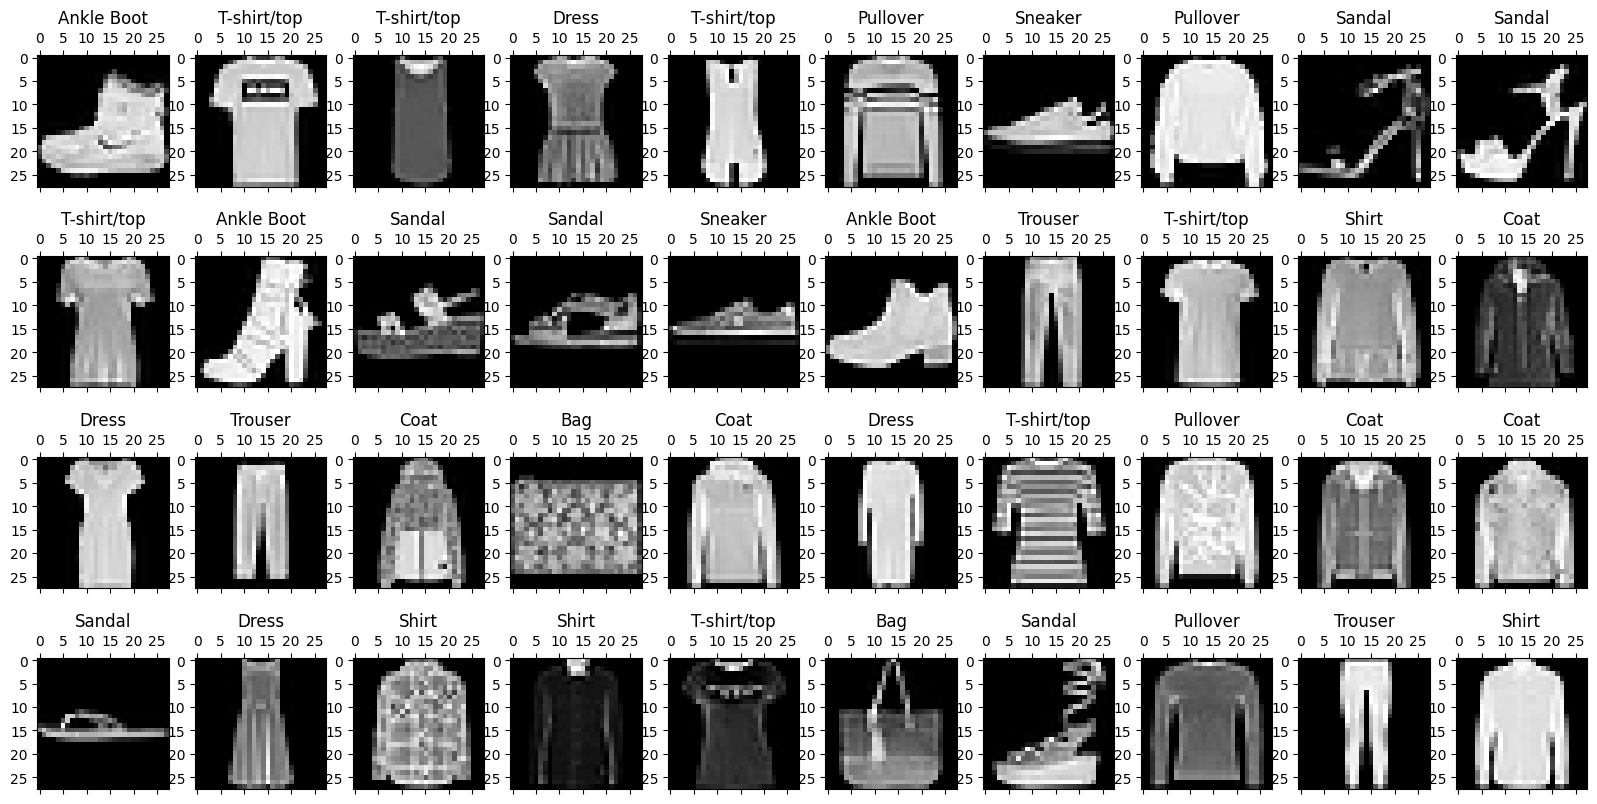

In [24]:
f = plt.figure(figsize=(20,10))

plt.gray()
for i in range(40):
    a = f.add_subplot(4, 10, i+1)
    a.matshow(X_tr[i])
    a.set_title(cls_names[y_tr[i]])

plt.show()

In [25]:
# tf.random.set_seed(42)
# sets seeds for TF, Python, Numpy
tf.keras.utils.set_random_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))  # input size doesn't incluce batch size
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [26]:
# can do it this way too
model = tf.keras.Sequential([
    # can drop Input and specify input_shape in first layer
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\dev\miniconda\envs\homl-learn\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Dense layers have a ton of params.
<br>Model has a lot of flexibility, and risk of overfitting when we don't have a lot of data

Each layer must have a unique name.
<br>We can set `name` in ctor, or let keras decide the name
<br>Keras converts class name to snake case and ensures it's globally unique (even across models) by appending an index
<br>Uniqueness helps in merging models w/o getting name conflicts

Global state is stored in `Keras.session`
<br>`tf.keras.backend.clear_session()` clears it, and resets the name counters

In [28]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [29]:
model.layers[1].name

'dense_3'

In [30]:
model.get_layer('dense_3') is model.layers[1]

True

In [32]:
# we can also set_weights
w, b = model.layers[1].get_weights()
w.shape, b.shape

((784, 300), (300,))

In [34]:
# it initialized w randomly and b to 0
w[:5], b[:5]

(array([[ 0.04701172,  0.02030142,  0.00017369, ..., -0.05407985,
         -0.05218757, -0.03243225],
        [ 0.05967203,  0.00751173, -0.00814871, ...,  0.0057645 ,
         -0.01201727, -0.03320028],
        [ 0.06289387, -0.01109221, -0.00166835, ..., -0.06984416,
          0.01197089,  0.01446974],
        [ 0.06597224, -0.03898626,  0.05996667, ..., -0.04355659,
          0.06092368,  0.05048899],
        [ 0.06227322,  0.03095135,  0.0714377 , ...,  0.06860551,
          0.06918132, -0.0228993 ]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32))

We can set `kernel_initializer` or `bias_initializer` to change initialization
  - kernel is another name for matrix of connection weights

Specifying `input_shape` is good if we know it.
<br>Otherwise, Keras waits until it's known (either when we feed data or when we call `build()`)
<br>Until model params are built, we can't do certain things like `model.summary()` or saving the model

In [40]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# same as this
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),  # we call this
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

`sparse_categorical_crossentropy`
  - cuz we have sparse labels
    - for each instance, there is just a target class idx and classes are exclusive
    - if we had 1 target proba per class (like one-hot vecs), we would need to use `categorical_crossentropy` instead
  - Basically, we can either specify y=3 or y = [0 0 1 0 0 0 ...]
    - y=3 is sparse "way" to specify target
    - y=[0 0 1 0 0 0 ...] is dense "way", cuz we're storing all probas
  - if we did binary clf or multilabel binary clf, we would use `sigmoid` and `binary_crossentropy` loss

  We can convert b/w sparse labels to one-hot vec labels using `tf.keras.utils.to_categorical()`
  <br>Vice versa conversion is done using `np.argmax()` with `axis=1`

In [41]:
hist = model.fit(X_tr, y_tr, epochs=30,
                 validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2200 - sparse_categorical_accuracy: 0.9225 - val_loss: 0.3435 - val_sparse_categorical_accuracy: 0.8786
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2162 - sparse_categorical_accuracy: 0.9243 - val_loss: 0.3425 - val_sparse_categorical_accuracy: 0.8798
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2124 - sparse_categorical_accuracy: 0.9258 - val_loss: 0.3433 - val_sparse_categorical_accuracy: 0.8794
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2085 - sparse_categorical_accuracy: 0.9274 - val_loss: 0.3425 - val_sparse_categorical_accuracy: 0.8822
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2051 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.3417 - val_sparse_categorical_accuracy: 0.8816
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2014 - sparse_categorical_accuracy: 0.9293 - val_loss: 0.3420 - val_sparse_categorical_accuracy:

It's useful to get used to shape-related error messages.
<br> Can try:
  - Fit model with inputs and/or labels of wrong shape
  - Compile model with incorrect loss
  - Remove Flatten layer

#### Some Parameters (val split instead of val data, sample and class weights)

We can specify `validation_split` as ratio of training set to use for validation, instead of `validation_data`

For skewed datasets, we can set `class_weight` when calling `fit()`
<br>For per-instance weights, set `sample_weight`
  - useful if some instances were labeled by experts, others using a crowdsourced platform
<br>If both are used, Keras multiplies them
<br>We can provide sample weights in `validation_data` as the 3rd item in the tuple 

#### History object

In [42]:
hist.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [43]:
hist.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [44]:
hist.history

{'loss': [0.22021722793579102,
  0.2164956033229828,
  0.2128371149301529,
  0.20912125706672668,
  0.20557181537151337,
  0.20197542011737823,
  0.19862423837184906,
  0.195176362991333,
  0.19191758334636688,
  0.18854746222496033,
  0.18546023964881897,
  0.18223778903484344,
  0.17900358140468597,
  0.17588655650615692,
  0.1728293001651764,
  0.16991114616394043,
  0.16686438024044037,
  0.16395303606987,
  0.16102637350559235,
  0.15822181105613708,
  0.15523800253868103,
  0.15275293588638306,
  0.1501244455575943,
  0.14749360084533691,
  0.14467252790927887,
  0.1418769657611847,
  0.13951990008354187,
  0.13704504072666168,
  0.13463681936264038,
  0.13218450546264648],
 'sparse_categorical_accuracy': [0.9217272996902466,
  0.923690915107727,
  0.9251090884208679,
  0.9262909293174744,
  0.9282545447349548,
  0.9290363788604736,
  0.9303454756736755,
  0.9317272901535034,
  0.9327454566955566,
  0.9342727065086365,
  0.9357636570930481,
  0.9369090795516968,
  0.9382363557815

In [45]:
hist.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

#### Learning Curves

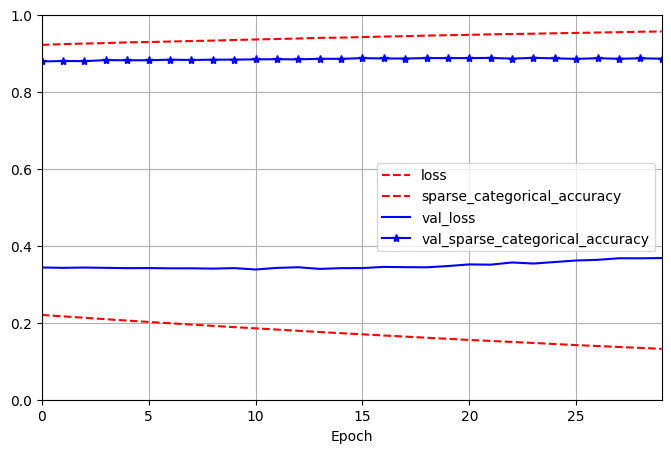

In [47]:
import pandas as pd

pd.DataFrame(hist.history).plot(
    figsize=(8,5), xlim=[0, 29], ylim=[0, 1],
    grid=True, xlabel='Epoch', style=['r--', 'r--', 'b-', 'b-*']
)
plt.show()

It may look like, in some cases, that model performed better on val set than training set in the beginning
<br>But this is because val error is computed at the *end* of each epoch, while training error is computing using a running mean *during* each epoch
<br>So training curve should be shifted by half an epoch to the left

Calling `fit()` again will continue the training, instead of restarting.

#### Evaluate
After hyperparam tuning, we can evaluate the model on test set

In [48]:
model.evaluate(X_ts, y_ts)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3826 - sparse_categorical_accuracy: 0.8790


[0.37429386377334595, 0.8810999989509583]

#### Prediction

In [49]:
X_new = X_ts[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [50]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [51]:
np.array(cls_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

### Regression MLP using Sequential API

In [53]:
tf.random.set_seed(42)

X_tr_full, X_ts, y_tr_full, y_ts = train_test_split(housing.data, housing.target, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_full, y_tr_full, random_state=42)


norm_layer = tf.keras.layers.Normalization(input_shape=X_tr.shape[1:])
model = tf.keras.Sequential([
    norm_layer,  # Standardize the features
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    # no activation function cuz it's a regression task
    tf.keras.layers.Dense(1),
])

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['RootMeanSquaredError'])

# must call this before fit()
norm_layer.adapt(X_tr)

hist = model.fit(X_tr, y_tr, epochs=20,
                 validation_data=(X_val, y_val))

mse_ts, rmse_ts = model.evaluate(X_ts, y_ts)

X_new = X_ts[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.2485 - loss: 1.6776 - val_RootMeanSquaredError: 0.6229 - val_loss: 0.3880
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6398 - loss: 0.4100 - val_RootMeanSquaredError: 0.5887 - val_loss: 0.3466
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6111 - loss: 0.3738 - val_RootMeanSquaredError: 0.7260 - val_loss: 0.5270
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5962 - loss: 0.3558 - val_RootMeanSquaredError: 0.8840 - val_loss: 0.7814
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5868 - loss: 0.3445 - val_RootMeanSquaredError: 0.8382 - val_loss: 0.7025
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5774 - loss: 0.3336 - val_RootMeanSquaredError: 0.9463 - val_loss: 0.8954
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5712 - los

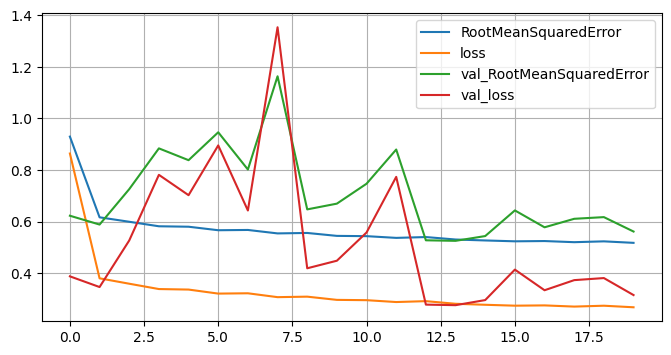

In [56]:
pd.DataFrame(hist.history).plot(figsize=(8, 4), grid=True)
plt.show()

In [57]:
mse_ts, rmse_ts

(0.281068354845047, 0.5301588177680969)

# Functional API

### Wide & Deep Neural Network
- Connects all or part of inputs directly to output layer
- NN can learn both deep patterns (using deep path) and simple rules (using short path)
- Regular MLP forces all data to flow through all layers
  - this can distory simple patterns in the data

In [58]:
norm_l = tf.keras.layers.Normalization()
hl_1 = tf.keras.layers.Dense(30, activation='relu')
hl_2 = tf.keras.layers.Dense(30, activation='relu')
concat_l = tf.keras.layers.Concatenate()
out_l = tf.keras.layers.Dense(1)

# functional api
# all of these are symbolic: we're just telling keras how to connect the layers
# nothing is processed yet
inp = tf.keras.layers.Input(shape=X_tr.shape[1:])  # dtype is float32 by default
normalized = norm_l(inp)
h1 = hl_1(normalized)
h2 = hl_2(h1)
concat = concat_l([normalized, h2])
out = out_l(concat)

model = tf.keras.Model(inputs=[inp], outputs=[out])

#### Sending Subsets of Features through Different Paths

In [60]:
inp_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4 = total 5
inp_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7 = total 6
norm_l_w = tf.keras.layers.Normalization()
norm_l_d = tf.keras.layers.Normalization()

norm_w = norm_l_w(inp_wide)
norm_d = norm_l_d(inp_deep)

# can construct and call the layer right here in 1 step
# we don't do this with norm layer cuz we need to call its adapt()
h1 = tf.keras.layers.Dense(30, activation='relu')(norm_d)
h2 = tf.keras.layers.Dense(30, activation='relu')(h1)
# note: this concatenate is with small letter
# this isn't a layer, so we don't need to construct it
concat = tf.keras.layers.concatenate([norm_w, h2])
out = tf.keras.layers.Dense(1)(concat)

# this model receives multiple inputs
model = tf.keras.Model(inputs=[inp_wide, inp_deep], outputs=out)

In [61]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['RootMeanSquaredError'])

# we can have sets w/ overlapping features
X_tr_w, X_tr_d = X_tr[:, :5], X_tr[:, 2:]
X_val_w, X_val_d = X_val[:, :5], X_val[:, 2:]
X_ts_w, X_ts_d = X_ts[:, :5], X_ts[:, 2:]

X_new_w, X_new_d = X_ts_w[:3], X_ts_d[:3]

norm_l_w.adapt(X_tr_w)
norm_l_d.adapt(X_tr_d)

# need to give pair of inputs now
hist = model.fit((X_tr_w, X_tr_d), y_tr, epochs=20,
                #  pair of inputs
                 validation_data=((X_val_w, X_val_d), y_val))
# pair of inputs
mse_ts = model.evaluate((X_ts_w, X_ts_d), y_ts)
# pair of inputs
y_pred = model.predict((X_new_w, X_new_d))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.5960 - loss: 2.6247 - val_RootMeanSquaredError: 1.4176 - val_loss: 2.0096
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7677 - loss: 0.5898 - val_RootMeanSquaredError: 0.8735 - val_loss: 0.7631
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6902 - loss: 0.4765 - val_RootMeanSquaredError: 0.6387 - val_loss: 0.4080
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6578 - loss: 0.4329 - val_RootMeanSquaredError: 0.6444 - val_loss: 0.4152
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6385 - loss: 0.4079 - val_RootMeanSquaredError: 0.6006 - val_loss: 0.3607
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6262 - loss: 0.3923 - val_RootMeanSquaredError: 0.5983 - val_loss: 0.3580
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - RootMeanSquaredError: 0.6176 - l

We can also pass a dict like `{"input_wide": X_tr_w, "input_deep": X_tr_d}` instead of tuples.
<br>This is preferred
<br>We clarify the code and avoid getting the order wrong when we have many inputs
<br>For this, we need to give names to the layers too

### Examples with Multiple Outputs
- Task demands it
  - want to locate and classify an object
  - is both a regression and clf task
- Multiple independent tasks on same data
  - Can train multiple NNs
  - But training 1 NN means it can learn features useful across tasks
- For regularization
  - training a constraint whose objective is to reduce overfitting
  - Can add auxiliary output to ensure underlying NN learns something useful on its own w/o relying on rest of network

#### Adding extra output

In [69]:
aux_out = tf.keras.layers.Dense(1)(h2)
model = tf.keras.Model(inputs=[inp_wide, inp_deep],
                       outputs=[out, aux_out])

# also need to pass multiple losses, 1 for each output
# if pass 1 loss, that loss is used for all
model.compile(loss=('mse', 'mse'),
            #   by default, keras will add up all the losses with equal weight
            #   but we may want our main loss to get more weight
              loss_weights=(0.9, 0.1),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['RootMeanSquaredError', 'RootMeanSquaredError'])

In [70]:
# also need to pass tuple of target y
hist = model.fit((X_tr_w, X_tr_d),
                 (y_tr, y_tr),
                 epochs=20,
                 validation_data=((X_val_w, X_val_d), (y_val, y_val)))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_22_RootMeanSquaredError: 0.5832 - dense_22_loss: 0.3062 - dense_28_RootMeanSquaredError: 1.3978 - dense_28_loss: 0.2053 - loss: 0.5114 - val_dense_22_RootMeanSquaredError: 0.7128 - val_dense_22_loss: 0.4572 - val_dense_28_RootMeanSquaredError: 1.1413 - val_dense_28_loss: 0.1302 - val_loss: 0.5876
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_22_RootMeanSquaredError: 0.5836 - dense_22_loss: 0.3066 - dense_28_RootMeanSquaredError: 0.7895 - dense_28_loss: 0.0624 - loss: 0.3690 - val_dense_22_RootMeanSquaredError: 0.7216 - val_dense_22_loss: 0.4686 - val_dense_28_RootMeanSquaredError: 0.9092 - val_dense_28_loss: 0.0826 - val_loss: 0.5514
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_22_RootMeanSquaredError: 0.5791 - dense_22_loss: 0.3019 - dense_28_RootMeanSquaredError: 0.7160 - dense_28_loss: 0.0513 - loss: 0.3532 - val_dense_22_RootMeanSquaredError: 0.7103 - val_dense_22_loss: 0.4540 - val_dense_28_Ro

In [72]:
# returns weighted sum of losses + individual losses and metrics
eval_results = model.evaluate((X_ts_w, X_ts_d), (y_ts, y_ts))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
# or we can get dict
model.evaluate((X_ts_w, X_ts_d), (y_ts, y_ts), return_dict=True)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - dense_22_RootMeanSquaredError: 0.5685 - dense_22_loss: 0.2910 - dense_28_RootMeanSquaredError: 0.6197 - dense_28_loss: 0.0384 - loss: 0.3294
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - dense_22_RootMeanSquaredError: 0.5685 - dense_22_loss: 0.2910 - dense_28_RootMeanSquaredError: 0.6197 - dense_28_loss: 0.0384 - loss: 0.3294


{'dense_22_RootMeanSquaredError': 0.5662636160850525,
 'dense_22_loss': 0.2880718410015106,
 'dense_28_RootMeanSquaredError': 0.6172499060630798,
 'dense_28_loss': 0.03806304559111595,
 'loss': 0.32668864727020264}

In [73]:
y_pred_main, y_pred_aux = model.predict((X_new_w, X_new_d))
# doesn't have a return_dict
# but we can make one
y_preds = dict(zip(model.output_names, (y_pred_main, y_pred_aux)))
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


{'dense_22': array([[0.49256963],
        [1.023248  ],
        [3.547918  ]], dtype=float32),
 'dense_28': array([[0.63514245],
        [0.91528475],
        [3.2223022 ]], dtype=float32)}

# Subclassing API

Sequential and Functional APIs are declarative
  - we declare which layers to use and how they connect
  - Advantages:
    - Easily save model, clone, share
    - Structure can be displayed and analyzed
    - Framework can infer shapes and check types
    - Errors are caught early, before any data goes through the model
    - Straightforward to debug, since whole model is a static graph of layers
  - Disadvantages:
    - It's static
    - Can't make models which:
      - Involve loops
      - Varying shapes
      - Conditional branching
      - Other dynamic behaviors

For dynamic models or imperative programming style, we use subclassing API

Can include anything in `call()`
<br>loops, if-statements, low-level TF operations, etc

But now model arch is hidden in `call()`
<br>Keras can't easily inspect it
  - can't clone it using `tf.keras.models.clone_model()`
  - `model.summary()` only gives list of layers w/o info on how they're connected
  - keras can't check types

Keras models can be used like layers, so we can combine multiple models for complex architectures.

In [92]:
# need to decorate this so we can save/load model
import keras
@keras.saving.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)  # needed to support naming

        self.norm_l_w = tf.keras.layers.Normalization()
        self.norm_l_d = tf.keras.layers.Normalization()
        self.h1 = tf.keras.layers.Dense(units, activation=activation)
        self.h2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_out = tf.keras.layers.Dense(1)
        self.aux_out = tf.keras.layers.Dense(1)

    def call(self, inputs):
        inp_w, inp_d = inputs
        
        norm_w = self.norm_l_w(inp_w)
        norm_d = self.norm_l_d(inp_d)

        h1 = self.h1(norm_d)
        h2 = self.h2(h1)

        concat = tf.keras.layers.concatenate([norm_w, h2])

        out = self.main_out(concat)
        aux_out = self.aux_out(h2)

        return out, aux_out

In [93]:
model = WideAndDeepModel(30, activation='relu', name='MyWideAndDeepModel')

model.summary()

Model: "MyWideAndDeepModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_13                │ ?                      │   0 (unbuilt) │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_14                │ ?                      │   0 (unbuilt) │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.compile(loss=('mse', 'mse'), optimizer='adam', metrics=['accuracy', 'accuracy'])

model.norm_l_w.adapt(X_tr_w)
model.norm_l_d.adapt(X_tr_d)

# by default epoch is 1
model.fit((X_tr_w, X_tr_d), (y_tr, y_tr), epochs=20)
model.evaluate((X_ts_w, X_ts_d), (y_ts, y_ts))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 6.2278 - mse_loss: 2.5244
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.0021 - accuracy_1: 0.0021 - loss: 1.2987 - mse_loss: 0.6590  
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.0022 - accuracy_1: 0.0023 - loss: 1.0671 - mse_loss: 0.5607
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.0022 - accuracy_1: 0.0023 - loss: 0.9851 - mse_loss: 0.5282
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.0022 - accuracy_1: 0.0022 - loss: 0.9271 - mse_loss: 0.5048  
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.0023 - accuracy_1: 0.0022 - loss: 0.8835 - mse_loss: 0.4847  
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.0023 - accuracy_1: 0.0022 - loss: 0.8440 - mse_loss: 0.4622  
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.0022 - accuracy_1: 0.0022 - 

[0.7125760316848755,
 0.0019379844889044762,
 0.0019379844889044762,
 0.3831309974193573,
 0.3831309974193573,
 0.0021317829377949238]

In [95]:
model.summary()

Model: "MyWideAndDeepModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_13                │ (11610, 5)             │            11 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_14                │ (11610, 6)             │            13 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,647 (14.26 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

 Optimizer params: 2,416 (9.44 KB)

# Save and Restore Models

In [96]:
model.save('wide_and_deep_model.keras')

### SavedModel
This format is needed by most TF deployment tools

`saved_model.pb`
  - contains arch + logic
  - stores as a serialized computation graph
  - only need to use this for production, no need to deploy model's source code
`keras_metadata.pb`
  - extra info needed by keras
`variables/`
  - contains all param values
    - connection weights, biases, normalization stats, optimizer params
    - can be split across files if model is large
`assets/`
  - extra files
    - data samples, feature names, class names, etc

Optimizer is saved too, so we can continue training after loading it

In [97]:
model.export("wide_and_deep_model")

INFO:tensorflow:Assets written to: wide_and_deep_model\assets


INFO:tensorflow:Assets written to: wide_and_deep_model\assets


Saved artifact at 'wide_and_deep_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): Tuple[TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)]
Output Type:
  Tuple[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  1602324951504: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  1602324951888: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  1602324953040: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  1602324953424: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  1602324945168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1602324946320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1602324946128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1602324945744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1602326056784: TensorSpec(shape=(), dtype=tf.

### Loading the model

In [98]:
model = tf.keras.models.load_model('wide_and_deep_model.keras')
model.predict((X_new_w, X_new_d))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


(array([[0.58665466],
        [1.1329693 ],
        [3.431662  ]], dtype=float32),
 array([[0.61015236],
        [0.9639009 ],
        [3.1733038 ]], dtype=float32))

Load SavedModel as a layer

In [103]:
model = tf.keras.layers.TFSMLayer("wide_and_deep_model", call_endpoint='serving_default')

### Saving and Loading Weights
Use `save_weights()`, `load_weights()`
<br>It's faster and uses less disk space, perfect for quick checkpoints during training.

# Callbacks

`fit()` takes list of objects
<br>These are called before & after training, before & after each epoch, and even before & after each batch

### `ModelCheckpoint` Callback
Saves checkpoints of model at regular intervals (by default, at end of epochs)

In [106]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5',
                                                   save_weights_only=True)
model = tf.keras.models.load_model('wide_and_deep_model.keras')
hist = model.fit((X_tr_w, X_tr_d), (y_tr, y_tr), epochs=20, callbacks=[checkpoint_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.0023 - accuracy_1: 0.0022 - loss: 0.7068 - mse_loss: 0.3770
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.7016 - mse_loss: 0.3743  
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6986 - mse_loss: 0.3727
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6943 - mse_loss: 0.3705  
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6914 - mse_loss: 0.3684
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6872 - mse_loss: 0.3661
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6840 - mse_loss: 0.3643
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 

We can set `save_best_only` if we provide `validation_data`

In [107]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5',
                                                   save_weights_only=True,
                                                   save_best_only=True)
model = tf.keras.models.load_model('wide_and_deep_model.keras')
hist = model.fit((X_tr_w, X_tr_d), (y_tr, y_tr),
                 validation_data=((X_val_w, X_val_d), (y_val, y_val)),
                 epochs=20, callbacks=[checkpoint_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0023 - accuracy_1: 0.0022 - loss: 0.7068 - mse_loss: 0.3770 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 1.6017 - val_mse_loss: 1.1702
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.7016 - mse_loss: 0.3743 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 0.9393 - val_mse_loss: 0.5885
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6986 - mse_loss: 0.3727 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 1.6497 - val_mse_loss: 1.1556
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6943 - mse_loss: 0.3705 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 0.9036 - val_mse_loss: 0.5068
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6914 - mse_loss: 0.3684 - val_accu

### `EarlyStopping` Callback
Interrupts training when it measures no progress on val set for a number of epochs (defined by `patience`)
<br>Set `restore_best_weights` to roll back to best model at end of training
<br>It stores these in RAM

In [108]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
model = tf.keras.models.load_model('wide_and_deep_model.keras')
hist = model.fit((X_tr_w, X_tr_d), (y_tr, y_tr),
                 validation_data=((X_val_w, X_val_d), (y_val, y_val)),
                 epochs=20,
                #  can combine both callbacks
                 callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0023 - accuracy_1: 0.0022 - loss: 0.7068 - mse_loss: 0.3770 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 1.6017 - val_mse_loss: 1.1702
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.7016 - mse_loss: 0.3743 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 0.9393 - val_mse_loss: 0.5885
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6986 - mse_loss: 0.3727 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 1.6497 - val_mse_loss: 1.1556
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6943 - mse_loss: 0.3705 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 0.9036 - val_mse_loss: 0.5068
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6914 - mse_loss: 0.3684 - val_accu

### Custom Callback
We can implement:
  - `on_epoch_begin/end`
  - `on_train_begin/end`
  - `on_batch_begin/end`

For evaluation (called by `evaluate()`):
  - `on_test_begin/end`
  - `on_test_batch_begin/end`

For prediction (called by `predict()`):
  - `on_predict_begin/end`
  - `on_predict_batch_begin/end`

In [109]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs['val_loss'] / logs['loss']
        print(f"Epoch {epoch}, val/train {ratio:.2f}")

# Tensorboard

- View learning curves
- Compare curves and metrics b/w runs
- Visualize computation graph
- Analyze training stats
- View images generated by model
- Visualize complex multi-dim data projected down to 3D + automatically clustered for you
- Profile your network
Etc

To use it:
- Want program to output the data we want to visualize to special binary logfiles (<b>event files</b>).
- Each binary record is called a <b>summary</b>

Tensorboard Server monitors the log dir, picks up changes and updates visualizations
  - can visalize live data w/ a short delay

In [110]:
from pathlib import Path
from time import strftime

# need different subdir for each run so same Tensorboard server instance won't mix up everything
def get_run_logdir(root_logdir='my_logs'):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [111]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                # profile the network b/w batches of 100 and 200
                                                # 100 cuz NN takes time to "warm up"
                                                # 100-200 cuz profiling takes resources and we don't want to profile on every batch
                                                profile_batch=(100, 200))
hist = model.fit((X_tr_w, X_tr_d), (y_tr, y_tr),
                 validation_data=((X_val_w, X_val_d), (y_val, y_val)),
                 epochs=20,
                 callbacks=[tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6779 - mse_loss: 0.3609 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 1.3737 - val_mse_loss: 0.9740
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6756 - mse_loss: 0.3589 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 1.0207 - val_mse_loss: 0.6349
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6733 - mse_loss: 0.3584 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 1.8634 - val_mse_loss: 1.1644
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0023 - accuracy_1: 0.0023 - loss: 0.6743 - mse_loss: 0.3581 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 0.9351 - val_mse_loss: 0.3748
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0022 - accuracy_1: 0.0023 - loss: 0.6701 - mse_loss: 0.3548 - val_accu

In [112]:
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss=('mse', 'mse'),
              optimizer=opt,
              metrics=['accuracy', 'accuracy'])

model.norm_l_w.adapt(X_tr_w)
model.norm_l_d.adapt(X_tr_d)

hist = model.fit((X_tr_w, X_tr_d), (y_tr, y_tr),
                 validation_data=((X_val_w, X_val_d), (y_val, y_val)),
                 epochs=20,
                 callbacks=[tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0022 - accuracy_1: 0.0023 - loss: 0.6645 - mse_loss: 0.3512 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 1.2709 - val_mse_loss: 0.6715
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0022 - accuracy_1: 0.0023 - loss: 0.6515 - mse_loss: 0.3460 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 2.5774 - val_mse_loss: 1.5781
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0022 - accuracy_1: 0.0023 - loss: 0.6574 - mse_loss: 0.3484 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 1.5072 - val_mse_loss: 0.9999
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0022 - accuracy_1: 0.0023 - loss: 0.6457 - mse_loss: 0.3420 - val_accuracy: 0.0044 - val_accuracy_1: 0.0041 - val_loss: 2.0663 - val_mse_loss: 1.1341
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0022 - accuracy_1: 0.0023 - loss: 0.6546 - mse_loss: 0.3456 - val_accu

We can load the Jupyter extension for Tensorboard and start the server
<br>We can also run it from terminal using `tensorboard --logdir=./my_logs`
<br>By default, it's on port 6006

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

"SCALARS" tab shows learning curves (we can select/deselect which ones to show in bottom left)
<br>Computation graph is in "GRAPHS"
<br>Learned weights (projected to 3D) in "PROJECTOR"
<br>Profiling traces in "PROFILE"

We can make TB callback log more data

There's a refresh button to refresh data.
<br>Can activate auto-refresh in the settings

### tf.summary
TF provides lower-level API in `tf.summary` package.
<br>This can be used to log scalars, histograms, images, audio and text, which can be visualized in TensorBoard

In [115]:
test_logdir = get_run_logdir()

writer = tf.summary.create_file_writer(str(test_logdir))

with writer.as_default():
    for step in range(1, 1000 +1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 1000
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        imgs = np.random.rand(2, 32, 32, 3) * step / 1000
        tf.summary.image("my_images", imgs, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_texts", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12_000)/48_000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48_000, step=step)

`tensorboard dev upload --logdir ./my_logs`
<br>This shares the results to https://tensorboard.dev
<br>Gives a permanent link to view results in a TB interface

Had to kill the TensorBoard process using:
  - `tasklist | more` to find process ID
  - `taskkill /F /PID <insert pid of tensorboard>`

# Finetuning NN Hyperparams
- Option 1: Convert Keras model to Sklearn estimator, use GridSearchCV or RandomizedSearchCV
  - `KerasRegressor`, `KerasClassifier` from <b>scikeras</b> library
- Better option: <b>Keras Tuner</b>


### Tuning Model HyperParams

Write a function that takes `kt.HyperParameters` object
<br>This obj is used to define the hyperparams (int, float, str, etc) + their range of values
<br>The returned hyperparams can be used in building and compiling the model

In [3]:
import keras_tuner as kt


def build_model(hp):
    # hp.Int() will check if a hyperparam "n_hidden" already exists
    # if it does, it returns its value
    # if it doesn't, it registers a new integer
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    # default isn't set, so min_value is returned by default
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    
    # sampling=log means learning rates will be sampled equally
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling='log')
    
    # default value is first choice
    optimizer = hp.Choice("optimizer", values=['sgd', 'adam'])
    if optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())

    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_tr_full, y_tr_full), (X_ts, y_ts) = fashion_mnist
X_tr, y_tr = X_tr_full[:-5000], y_tr_full[:-5000]
X_val, y_val = X_tr_full[-5000:], y_tr_full[-5000:]

X_tr, X_val, X_ts = X_tr / 255., X_val / 255., X_ts / 255.
cls_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
             "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

`kt.RandomSearch` tuner calls our `build_model()` with an empty `Hyperparameters` obj to gather all hyperparams specs
<br>Then here it runs 5 trials
  - for each trial, it builds the model using hyperparams sampled randomly
  - trains it for 10 epochs (we specify it in `search()`)
  
`overwrite=True` makes it delete the `my_random_search` dir before training starts

if we run it with `overwrite=False` and `max_trials=10`, it'll continue from where it left off (will run 5 more trials), meaning we don't need to run all trials in 1 shot

`objective='val_accuracy'` means tuner prefers models w/ higher val accuracy

In [6]:
random_search_tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=5, overwrite=True,
    directory='my_fashion_mnist', project_name='my_random_search', seed=42
)

random_search_tuner.search(X_tr, y_tr, epochs=10,
                           validation_data=(X_val, y_val))

Trial 5 Complete [00h 00m 27s]
val_accuracy: 0.7603999972343445

Best val_accuracy So Far: 0.8669999837875366
Total elapsed time: 00h 02m 29s


In [7]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

c:\dev\miniconda\envs\homl-learn\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
# gives kt.HyperParameters object
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 8,
 'n_neurons': 37,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

Each tuner is guided by <b>"oracle"</b> before each trial.
  - Tuner asks oracle what the next trial should be
  - `RandomSearch` uses `RandomSearchOracle`
    - picks next trial randomly
  - Oracle keeps track of trails, we can get the best one + its summary

In [11]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8669999837875366


In [13]:
best_trial.metrics.get_last_value('val_accuracy')

0.8669999837875366

If we're happy with best model's performance, we can then train it on full training set

In [14]:
best_model.fit(X_tr_full, y_tr_full, epochs=10)
test_loss, test_acc = best_model.evaluate(X_ts, y_ts)
test_loss, test_acc

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1014 - loss: 108044326147194880.0000
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0969 - loss: 2.3031
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0972 - loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1000 - loss: 2.3026
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0999 - loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0994 - loss: 2.3026
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0985 - loss: 2.3027
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1008 - loss: 2.3027
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0987 - loss: 2.3027
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0962 - loss: 2.3026


(2.30259370803833, 0.10000000149011612)

### Tuning Data Preprocessing HyperParams & `model.fit()` Args
Need to subclass `kt.HyperModel`

In [15]:
class MyClfHyperModel(kt.HyperModel):
    # same as build_model, so reuse it
    def build(self, hp):
        return build_model(hp)

    # takes HyperParameters obj, compiled model + all args to model.fit()
    def fit(self, hp, model, X, y, **kwargs):
        # control whether to normalize the data or not
        if hp.Boolean("normalize"):
            norm_l = tf.keras.layers.Normalization()
            X = norm_l(X)
        return model.fit(X, y, **kwargs)

Can pass an instance of this class to tuner, instead of `build_model()`
<br>Here, we try `kt.Hyperband()` tuner
  - Similar to `HalvingRandomSearchCV` in ch2
    - Trains many models for few epochs
    - Eliminates worst model, keeps only top "1/factor" models (top 3 in this case)
    - Repeats this selection until 1 model is left
  - best model is trained for `max_epochs`
  - Whole process is done twice cuz `hyperband_iterations=2`
    - Total training epochs = `max_epochs * (log(max_epochs) / log(factor))**2`


In [16]:
hyperband_tuner = kt.Hyperband(
    MyClfHyperModel(), objective='val_accuracy', seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory='my_fashion_mnist', project_name='hyperband'
)

For TensorBoard, point `--logdir` to "my_fashion_mnist/hyperband/tensorboard"
<br>`HPARAMS` tab shows call hyperparam combinations
<br>Inside it, there are 3 more tabs:
  - table view
  - parallel coordinates view
  - scatterplot matrix view

<br>Keeping only `validation.epoch_accuracy` checked in lower-left shows only those hyperparams that reached a good performance 

I interrupted the kernel at Trial 58
<br>At this point, it was running for 45m 54s

In [18]:
from pathlib import Path

root_logdir = Path(hyperband_tuner.project_dir)/"tensorboard"
# kt.Hyperband takes care of using a diff subdir for each trial
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)

hyperband_tuner.search(X_tr, y_tr, epochs=10,
                       validation_data=(X_val, y_val),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 58 Complete [00h 00m 41s]
val_accuracy: 0.8510000109672546

Best val_accuracy So Far: 0.8862000107765198
Total elapsed time: 00h 45m 54s

Search: Running Trial #59

Value             |Best Value So Far |Hyperparameter
4                 |7                 |n_hidden
203               |247               |n_neurons
0.0011923         |0.00039877        |learning_rate
sgd               |adam              |optimizer
False             |True              |normalize
10                |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
0                 |1                 |tuner/bracket
0                 |1                 |tuner/round

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3775 - loss: 1.9694 - val_accuracy: 0.6878 - val_loss: 0.9954
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6906 - loss: 0.9134 - val_accuracy: 0.7488 - val_loss: 0.7271
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accur

KeyboardInterrupt: 

`Hyberband` is smarter than pure random search in the way it allocates resources, but at its core, it still explorers hyperparam space random
  - fast but coarse


#### `kt.BayesianOptimization`
- Learns which regions of hyperparam sapce are most promising
  - allows to zoom in on best hyperparams
- Fits a probabilistic model called <b>Gaussian Process</b>
- Downside: it has its own hyperparams
  - `alpha`: level of noise expected in performance measures across trials
    - 10e-4 default
  - `beta`: how much u want algo to explore, instead of simply exploiting known good regions
    - 2.6 default

In [20]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClfHyperModel(), objective='val_accuracy', seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory='my_fashion_mnist', project_name='bayesian_opt'
)

root_logdir = Path(bayesian_opt_tuner.project_dir)/"tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)

bayesian_opt_tuner.search(X_tr, y_tr, epochs=10,
                          validation_data=(X_val, y_val),
                          callbacks=[early_stopping_cb, tensorboard_cb])

Trial 10 Complete [00h 00m 41s]
val_accuracy: 0.7797999978065491

Best val_accuracy So Far: 0.8830000162124634
Total elapsed time: 00h 07m 36s


### More Hyperparam Tuning
- DeepMind's 2017 paper, where they used evolutionary algo to optimize a population of models and their hyperparameters
- Google also did not only this, but they also used it to explore all sorts of model archs
  - it powers their <b>AutoML</b> service on <b>Google Vertex AI</b>

#### AutoML
- refers to any sys that takes care of a large part of ML workflow

Evolutionary algos have been used to train NNs, replacing Gradient Descent
 - 2017 post by Uber, where they introduced <b>Deep Neuroevolution</b>

# Guidelines for Hyperparams
Despite all above automatic ways of finding hyperparams, still need to have idea of reasonable values to use for quick prototyping and to restrict the search space

### Number of Hidden Layers
- Can start w/ 1 HL
  - given enough neurons, 1 HL can model any function
- For complex problems, DNNs have higher <b>parameter efficiency</b>
  - model complex funcs using exponentially fewer neurons, reaching same perf, with same amount of data

#### Reason for Parameter Efficiency
E.g. asked to draw a forest w/o using copy/past
  - would need to draw every tree individually, leaf by leaf
  - this takes enormous amount of time
  - If we could draw a leaf, copy/paste it to draw a branch, copy/ paste it to make a tree, and then copy/paste it to make a forest, we will finish in no time
  - Real-world data is structured in such a hierarchical way
  - DNNs take advantage of this automatically
    - lower layers model low-level structures, intermediate combine them to model intermediate-level structures, highest layers & output layer combine them to model high-level structures
      - e.g. lines -> squares, circles -> faces

This hierarchical arch helps converge faster + also improves generalization ability
  - can use lower layers of NN trained on faces to recognize hairstyles to kickstart training
  - Would only need to learn higher-level structures
    - AKA <b>Transfer Learning</b>
  
#### Summary
  - For many problems, 1 or 2 HLs are fine
    - 1 HL reaches above 97% accuracy on MNIST
  - For more complex, ramp up number of HLs until we overfit the training set
  - For very complex tasks, reuse pretrained state-of-the-art networks
    - training will be a lot faster + require much less data
    - e.g. large img clf or speech recognition

### Number of Neurons per HL
- For input and output layers, task determines it
- For HL:
  - Used to be common to form a pyramid
    - fewer and fewer neurons at each layer
    - rationale: low-level features coalesce into far fewer high-level features
  - But this practice was abandoned cuz:
    - using same number of neurons performs as well or even better
    - only 1 hyperparam to tune, instead of 1 per layer
  - But, depending on dataset, can be helpful to make 1st HL bigger than others

Can increase until overfitting
<br>Or can build model with slightly more layers & neurons than you need, then use early stopping + regularization techniques
  - <b>"stretch pants"</b> approach
    - instead of wasting time looking for pants that perfectly match, just use large stretch pants that will shrink down to right size
  - avoids bottleneck layers
    - if layer has too few neurons, it won't have enough representational power to preserve all useful info
    - e.g. layer with 2 neurons can only output 2D data, so some 3D info will be lost
      - can't recover this info, no matter how big or small the rest of the network is

In general, you get more bang for you buck by increasing number of layers instead of neurons per layer

### Learning Rate, Batch Size, Other Hyperparams
#### Learning Rate
  - most imp
  - optimal LR is half of max LR
    - max LR = above which training algo diverges
  - train for a few 100 iters, starting w/ very low LR (e.g. 10e-5), gradually increasing to a large value (e.g. 10)
    - by multiplying LR by a constant factor at each iter
    - by (10/10e-5)<sup>1/500</sup> to from from 10e-5 to 10 in 500 iters
  - plot loss as func of LR, w/ log scale for loss
    - Loss will drop, then shoot up cuz LR will be too large
    - optimal LR is a bit lower than the point where loss starts to climb
      - typically 10 times lower than turning point
  - other LR optimization techniques in next ch
  - optimal LR also depends on other hyperparams, so update LR if we change others
#### Optimizer
  - imp to choose better opt than mini-batch gradient descent & tune its hyperparams
  - advanced optimizers in next ch
#### Batch size
  - significant impact on perf + training time
  - main benefit of large batch size = h/w accelerators (e.g. GPUs) process them efficiently, so training algo sees more instances per sec
  - recomm to use largest batch size that can fit in GPU RAM
    - catch: in practice, large batch sizes often lead to training instabilities, esp at beginning of training
    - so model may not generalize as well as model trained w/ small batch size
  - "friends don't let friends use mini-batches larger than 32"
    - plus 2018 paper which concludes small batches (2 to 32) is preferable cuz they led to better models in less training time
  - other papers, like in 2017
    - possible to use very large batch sizes (up to 8,192) along w/ techniques (e.g. warming up LR, is in next ch) & to obtain very short training times w/o any generalization gap
  - So: try large batch size w/ LR warmup and if it's unstable or final perf is disappointing, use small batch size instead
#### Activation func
  - discussed how to choose this earlier in this ch
  - in general, ReLU is good default
  - for output layer, it depends on task
    - clf -> sigmoid or softmax
    - want +ve output -> ReLU
    - regression -> no function
#### Num of iters
  - doesn't need to be tweaked: use early stopping

For more best practices, check 2018 paper by Leslie Smith